# **Connecting to InterSystem IRIS Relational Model from C# (via ODBC)**

This notebook provides a step-by-step guide for C# developers looking to connect to and interact with InterSystems IRIS SQL using the industry-standard ODBC (Open Database Connectivity) bridge.

## Step 1. Prerequisites
Before writing any code, ensure that all necessary components are installed.
|     Component     |   Status  |                           Check                    |
|-------------------|-----------|----------------------------------------------------|
| InterSystems IRIS | Running   | Ensure the IRIS instance is started and accessible |
| ODBC Driver       | Installed | The InterSystems IRIS ODBC35 driver must be present on the machine running the C# application |
| C# project        | Ready     | Your project should be set up in Visual Studio or your preferred IDE |

- If InterSystems IRIS is installed on the same machine - the driver is already present.
- If InterSystems IRIS is installed on a remote server - you must download and install the standalone ODBC client driver package for your client operating system and bitness (32-bit or 64-bit) from WRC website if you're a client or by installing Client components and copying ODBC driver manually.
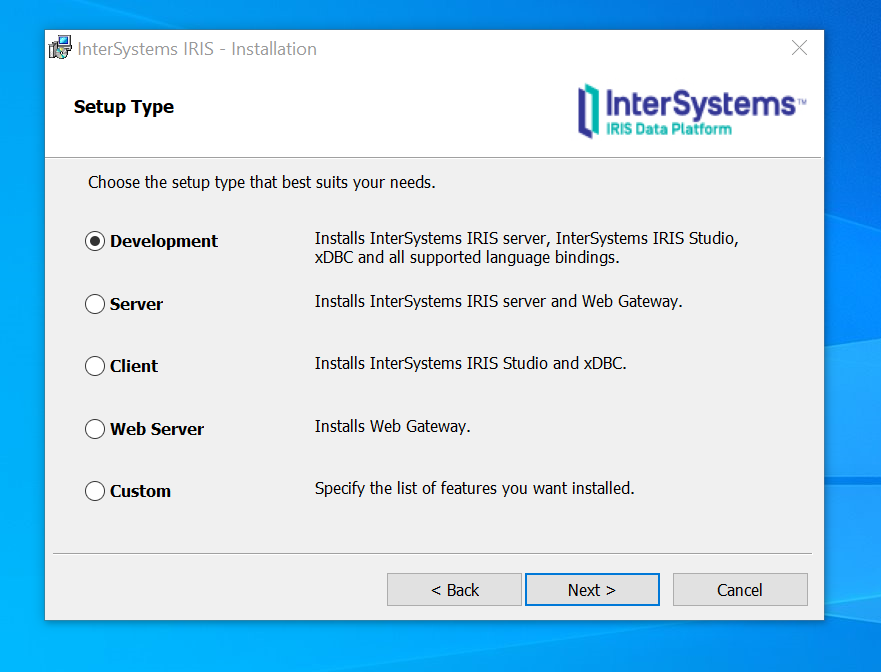

To verify the presence of ODBC driver open **ODBC Data Source Administrator** tool on Windows and look for the InterSystems IRIS ODBC35 driver:

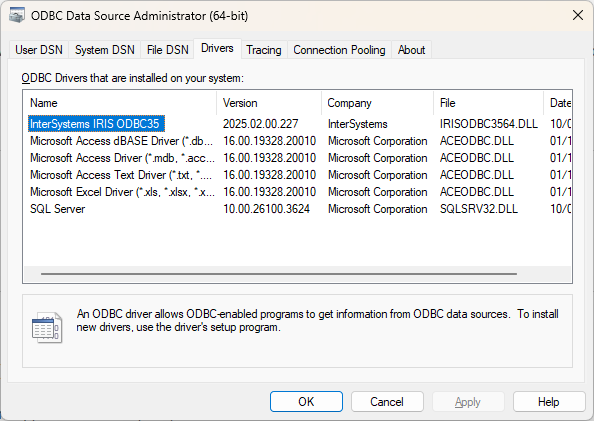

## Step 2. Forming connection string
The preferred way to connect to InterSystems IRIS from C# is to use DSN-less connection string as it keeps all connection details within the application code, simplifying deployment and avoiding dependence on pre-configured system settings on the client machine.
The string requires four critical pieces of information: the Driver name, the Server location (Host and Port), the target Namespace, and Credentials (UID and PWD):
<pre>// Connection String Breakdown
string connectionString = 
    "DRIVER={InterSystems IRIS ODBC35};" +
    "Server=127.0.0.1;" +          // Hostname or IP of the IRIS server
    "Port=51773;" +                // SuperServer TCP Port
    "Database=USER;" +             // Target IRIS Namespace
    "UID=_System;" +               // Username (Case-Insensitive)
    "PWD=SYS;";                    // Password (Case-Sensitive, if default)
</pre>

## Step 3. Writing C# code to get data from InterSystems IRIS via ODBC
- In the dedicated class add links to the assemblies that contain necessary classes to work with ODBC:
<pre>using System;
using System.Data;
using System.Data.Odbc;
</pre>
- Create and open the connection to the database using the connectionString from Step 2:
<pre>// Use the 'using' block to ensure the connection is properly closed, 
// even if errors occur.
using (OdbcConnection connection = new OdbcConnection(connectionString))
{
    connection.Open();
}
</pre>
- Create and execute a SQL statement using OdbcCommand class:
<pre>// Define the SQL Query
string sql = "SELECT ID, Name, DOB FROM Sample.Person WHERE ID < 5";
using (OdbcCommand command = new OdbcCommand(sql, connection))
{
    using (OdbcDataReader reader = command.ExecuteReader())
    { 
        //do something with the results
    }
}
</pre>
- Loop throught the result
<pre>while (reader.Read())
{
    // Access data by column name or index
    string id = reader["ID"].ToString();
    string name = reader["Name"].ToString();
    string dob = reader["DOB"].ToString();                            
    Console.WriteLine($"ID: {id}, Name: {name}, DOB: {dob}");
}
</pre>

## Resulting class
Here's the whole class including exception handling:
<pre>using System;
using System.Data;
using System.Data.Odbc;

public class IrisOdbcConnector
{
    public static void Main(string[] args)
    {
        // Define the DSN-less connection string
        string connectionString =
            "DRIVER={InterSystems IRIS ODBC35};" +
            "Server=127.0.0.1;Port=51773;Database=USER;" +
            "UID=_System;PWD=SYS;";

        // Define the SQL Query
        string sql = "SELECT ID, Name, DOB FROM Sample.Person WHERE ID < 5";

        // Use the 'using' block to ensure the connection is properly closed, 
        // even if errors occur.
        using (OdbcConnection connection = new OdbcConnection(connectionString))
        {
            try
            {
                // Open the connection to InterSystems IRIS
                connection.Open();
                Console.WriteLine("Connection to InterSystems IRIS successful!");

                // Create the command and associate it with the connection
                using (OdbcCommand command = new OdbcCommand(sql, connection))
                {
                    // Execute the query and get a data reader
                    using (OdbcDataReader reader = command.ExecuteReader())
                    {
                        // Loop through each row returned
                        while (reader.Read())
                        {
                            // Access data by column name or index
                            string id = reader["ID"].ToString();
                            string name = reader["Name"].ToString();
                            string dob = reader["DOB"].ToString();
                            
                            Console.WriteLine($"ID: {id}, Name: {name}, DOB: {dob}");
                        }
                    }
                }
            }
            catch (OdbcException ex)
            {
                // Catch specific ODBC errors (e.g., driver not found, network failure)
                Console.WriteLine($"\n--- ODBC Error ---");
                Console.WriteLine($"Failed to connect or execute query: {ex.Message}");
            }
            catch (Exception ex)
            {
                // Catch other general errors
                Console.WriteLine($"\n--- General Error ---");
                Console.WriteLine($"An unexpected error occurred: {ex.Message}");
            }
        }
    }
}
</pre>
